# Two dimensional PCA

In matrix operation perspective, what PAC does is diagonalize covariance matrix. Usually we use SVD to do this.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import scipy.io as sio

## Load data 

In [2]:
def get_X(df):
    """add intersect feature to avoid side effect."""
    ones = pd.DataFrame({'ones': np.ones(len(df))})
    data = pd.concat([ones, df], axis=1)
    return data.iloc[:, :-1].values

def get_y(df):
    """assume the last column is the target"""
    return np.array(df.iloc[:, -1])

def normalize_feature(df):
    return df.apply(lambda column: (column - column.mean()) / column.std())

In [3]:
mat = sio.loadmat('./data/ex7data1.mat')
print(mat.keys())
X = mat.get('X')
m = X.shape[0]
df = pd.DataFrame(X, columns=['X1', 'X2'])
df.sample(3)

dict_keys(['__header__', '__version__', '__globals__', 'X'])


,X1,X2
3,2.765235,3.715414
34,3.375427,4.565379
25,3.223829,4.942556


In [4]:
def covariance_matrix(X):
    return (X.T @ X) / X.shape[0]

def project_data(X, U, k):
    """project data (n dimension to k dimension)"""
    m, n = X.shape
    if k > n:
        raise ValueError('k should be lower dimension of n')
    
    return X @ U[:, :k]

def recover_data(Z, U):
    m, n = Z.shape
    
    if n >= U.shape[0]:
        raise ValueError('Z dimension should be less than U')
    
    recovered = Z @ U[:, :n].T
    recovered.columns = ['X1', 'X2']
    return recovered
    

In [5]:
X = get_X(df)
# normalize features
X_norm = normalize_feature(df)
# diagonolize covariance matrix
U, S, V = np.linalg.svd(X_norm.T @ X_norm / X.shape[0])
U

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

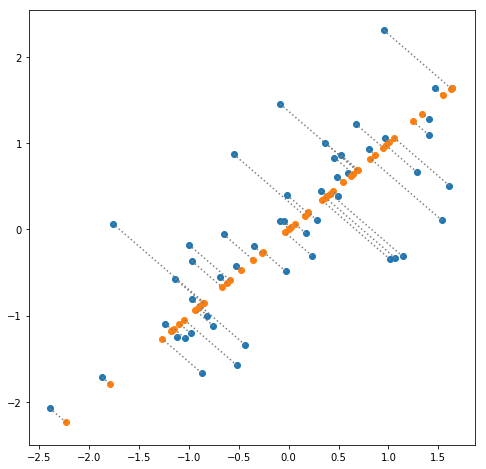

In [6]:
projected = project_data(X_norm, U, 1)
recovered = recover_data(projected, U)
plt.figure(figsize=(8,8))
plt.scatter(X_norm.X1, X_norm.X2)
plt.scatter(recovered.X1, recovered.X2)
# show how 2-d data project to 1-d data
for i in range(m):
    plt.plot([X_norm.iloc[i,0], recovered.iloc[i,0]], 
             [X_norm.iloc[i,1], recovered.iloc[i,1]], 
             linestyle=':', c='grey')